In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score,roc_curve, auc, precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [21]:
df= pd.read_csv('cleaned_adult.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   32561 non-null  int64  
 1   fnlwgt                                32561 non-null  int64  
 2   education                             32561 non-null  float64
 3   education.num                         32561 non-null  int64  
 4   occupation                            32561 non-null  float64
 5   capital.gain                          32561 non-null  int64  
 6   capital.loss                          32561 non-null  int64  
 7   hours.per.week                        32561 non-null  int64  
 8   native.country                        32561 non-null  float64
 9   income                                32561 non-null  int64  
 10  sex_Male                              32561 non-null  bool   
 11  race_Asian-Pac-

In [22]:
x= df.drop(['income'], axis=1)
y= df['income'] 

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,  random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(26048, 32)
(6513, 32)
(26048,)
(6513,)


In [23]:
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)




In [24]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
y_pred= knn.predict(x_test)

accuracy= accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8300322432058959


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


[[4519  457]
 [ 650  887]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4976
           1       0.66      0.58      0.62      1537

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.83      6513



In [32]:
param_grid= {'n_neighbors':[3,5,7,9,11],
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}

knn= KNeighborsClassifier()

grid= GridSearchCV(knn, param_grid,cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train,y_train)
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score:  0.8390662256267667


In [33]:
best_knn= grid.best_estimator_
y_pred= best_knn.predict(x_test)

print("Accuracy: ", accuracy_score(y_test,y_pred))
print('classification_report:', classification_report(y_test, y_pred))

Accuracy:  0.8352525717795178
classification_report:               precision    recall  f1-score   support

           0       0.87      0.92      0.90      4976
           1       0.68      0.56      0.62      1537

    accuracy                           0.84      6513
   macro avg       0.78      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



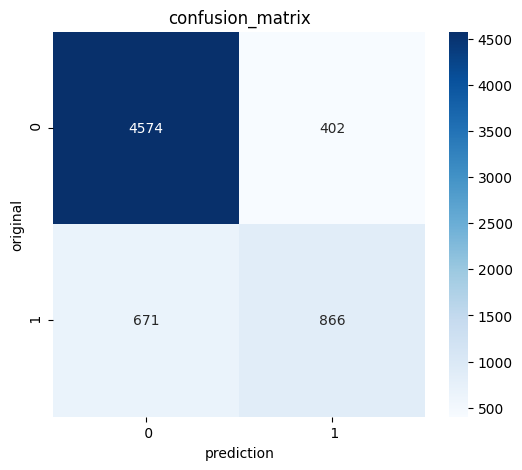

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[" 0", " 1"], yticklabels=[" 0", " 1"])
plt.xlabel('prediction')
plt.ylabel('original')
plt.title('confusion_matrix')
plt.show()

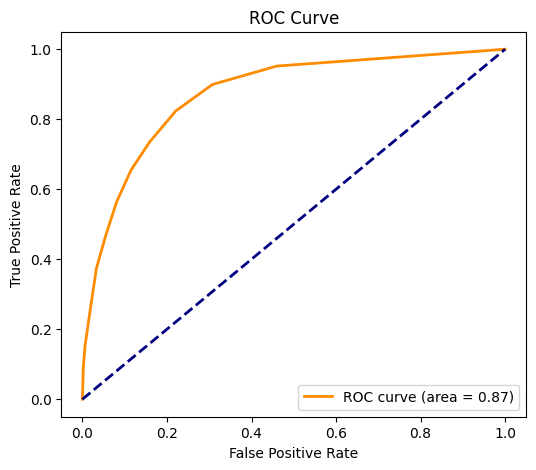

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, best_knn.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


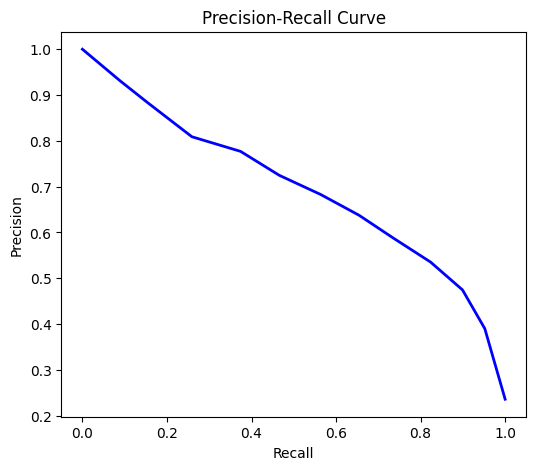

In [41]:
precision, recall, _ = precision_recall_curve(y_test, best_knn.predict_proba(x_test)[:, 1])

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
